In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
train_normal_path = 'C:\Users\jihun\4255\OpensourceHW\pkl_result\train/normal/window_100'
train_stress_path = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/stress'
test_path = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test'

500

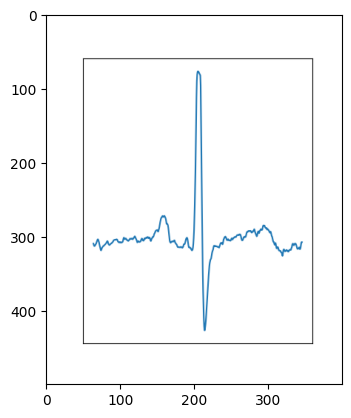

In [4]:
img = plt.imread(train_normal_path+'/S2_1.png')
plt.imshow(img)
img.shape[0]

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_100',
    target_size=(400, 400),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_100',
    target_size=(400, 400),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 37519 images belonging to 2 classes.
Found 4168 images belonging to 2 classes.


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train',
    target_size=(400, 400),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train',
    target_size=(400, 400),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 2160 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3, activation = "relu", input_shape=[400,400,3]),
    tf.keras.layers.Conv2D(64,3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 396, 396, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 627264)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1254530   
Total params: 1,273,922
Trainable params: 1,273,922
Non-trainable params: 0
______________________________________________

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [6]:
history = model.fit(train_generator, epochs=10, verbose=1, validation_data=validation_generator)

Epoch 1/10
2345/2345 [==============================] - 177s 71ms/step - loss: 0.2125 - accuracy: 0.9164 - val_loss: 1.2265 - val_accuracy: 0.7217
Epoch 2/10
2345/2345 [==============================] - 166s 71ms/step - loss: 0.1172 - accuracy: 0.9606 - val_loss: 1.6519 - val_accuracy: 0.6893
Epoch 3/10
2345/2345 [==============================] - 161s 69ms/step - loss: 0.0917 - accuracy: 0.9697 - val_loss: 2.3309 - val_accuracy: 0.6607
Epoch 4/10
2345/2345 [==============================] - 161s 68ms/step - loss: 0.0731 - accuracy: 0.9757 - val_loss: 2.0087 - val_accuracy: 0.6677
Epoch 5/10
2345/2345 [==============================] - 161s 69ms/step - loss: 0.0575 - accuracy: 0.9813 - val_loss: 2.5804 - val_accuracy: 0.6579
Epoch 6/10
2345/2345 [==============================] - 163s 70ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 2.6418 - val_accuracy: 0.6677
Epoch 7/10
2345/2345 [==============================] - 161s 68ms/step - loss: 0.0365 - accuracy: 0.9876 - val_loss: 3

In [8]:
val_acc

[0.7216890454292297,
 0.6892994046211243,
 0.6607485413551331,
 0.667706310749054,
 0.6578694581985474,
 0.667706310749054,
 0.6643474102020264,
 0.6489923000335693,
 0.6535508632659912,
 0.6569097638130188]

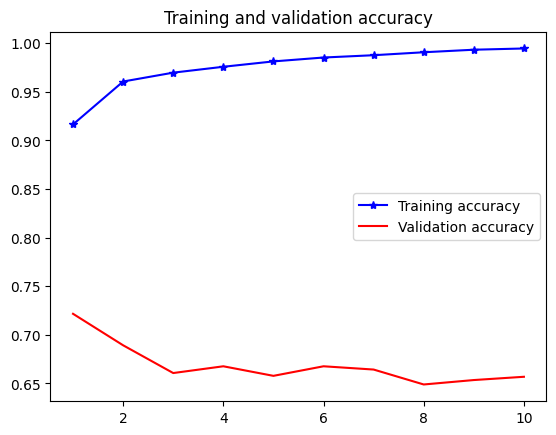

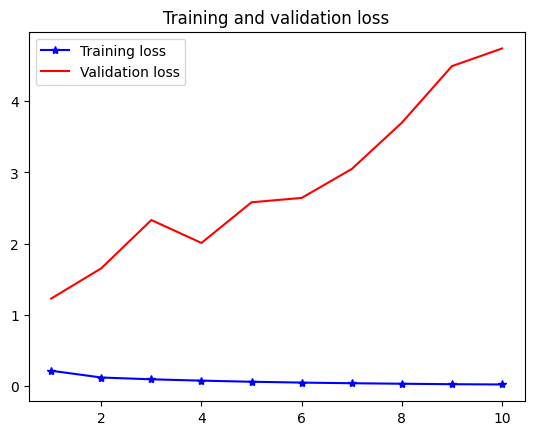

In [7]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

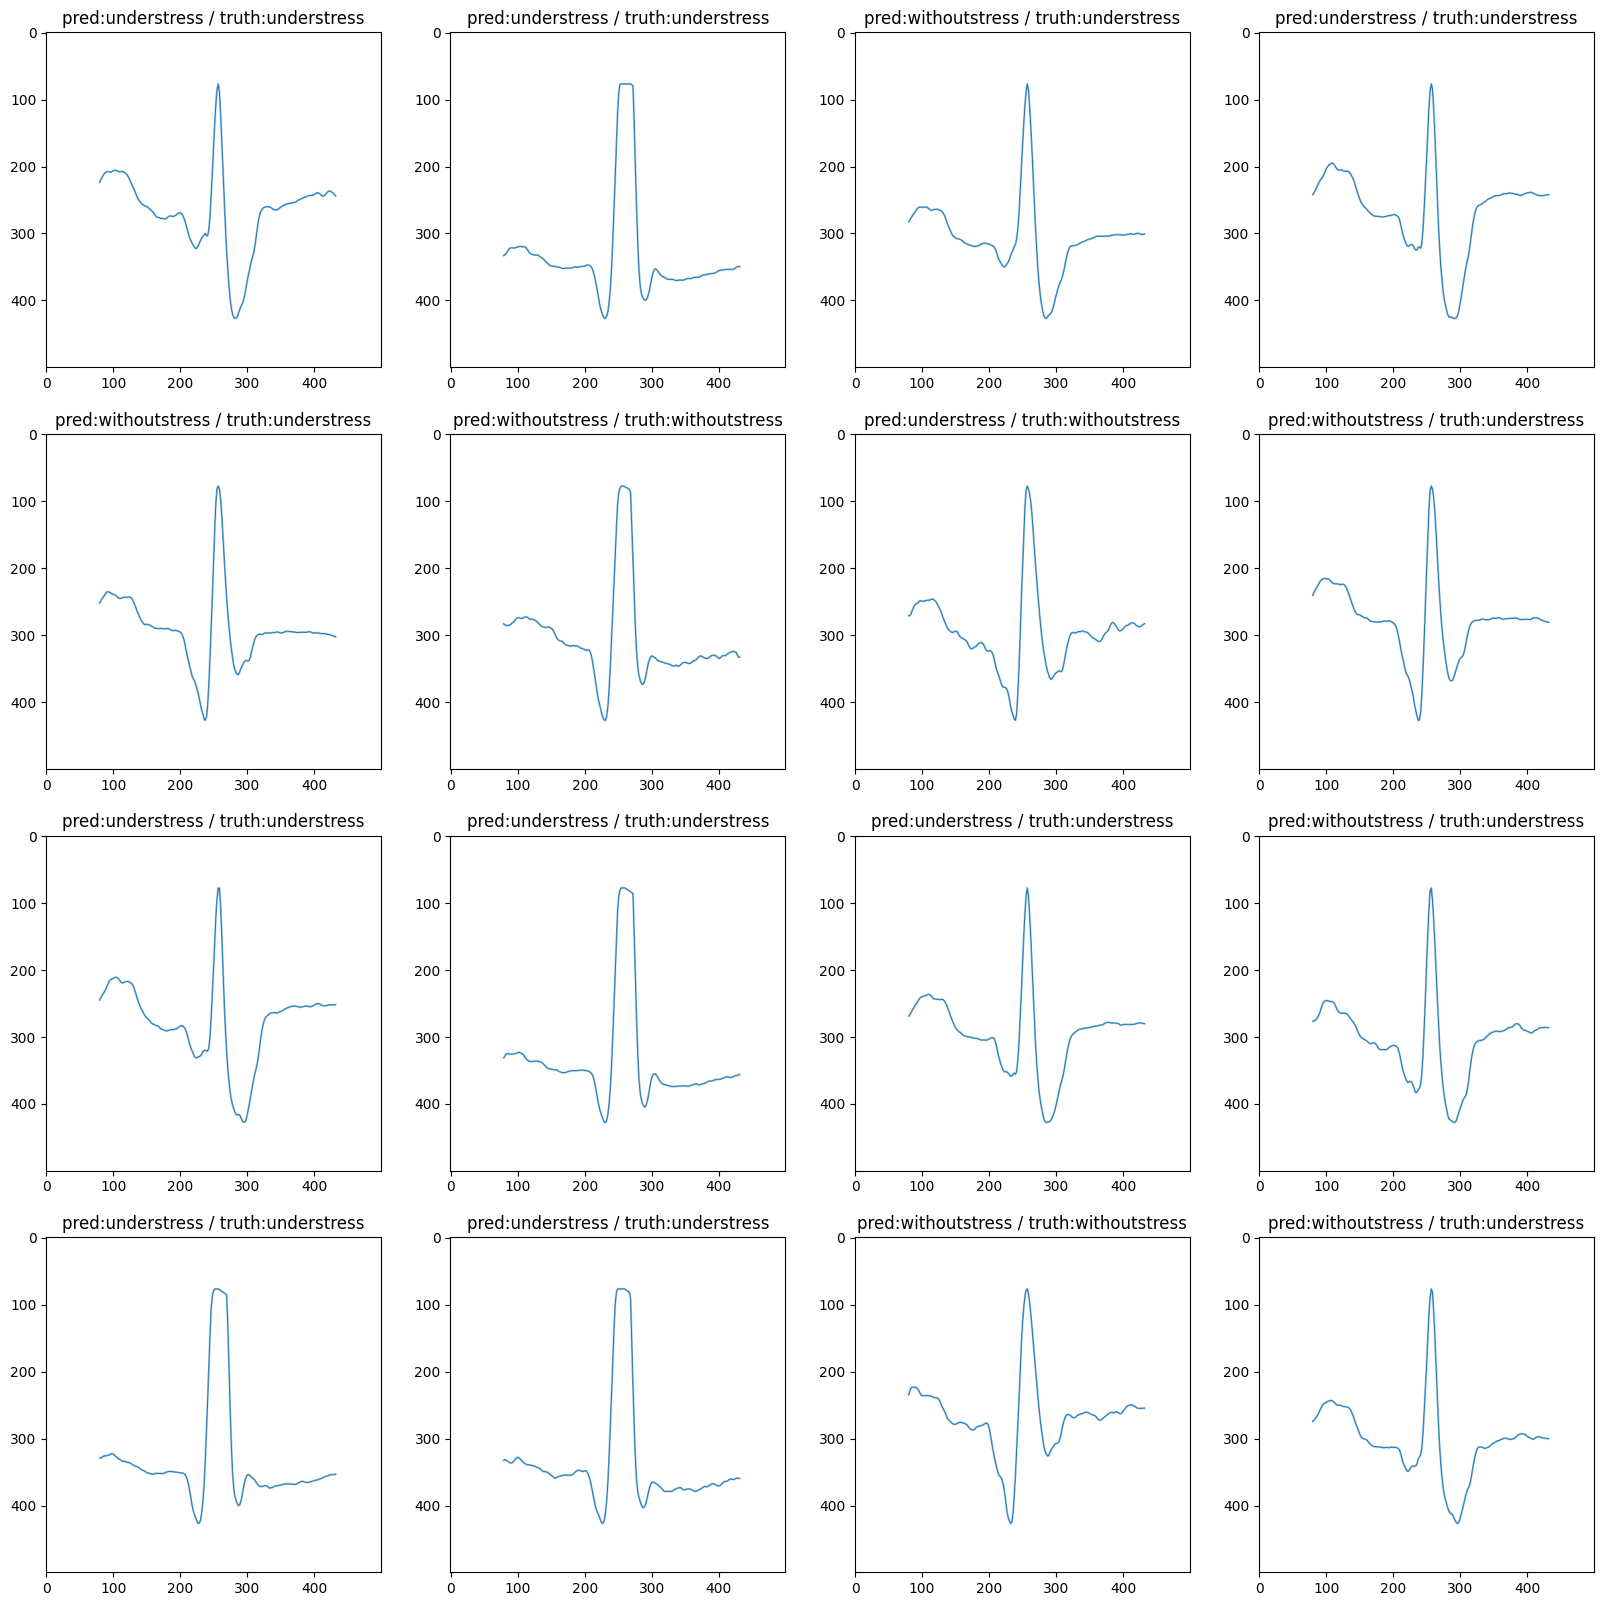

In [13]:
test_x, test_y = validation_generator.__getitem__(1)
preds = model.predict(test_x)
labels =['understress', 'withoutstress']
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [57]:
# 이미지 경로 설정
test_data_dir = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test'

# 이미지 데이터 전처리
test_data_generator = ImageDataGenerator(rescale=1./255)  # 이미지 정규화
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(400, 500),  # 이미지 크기 조정
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)
# 테스트 데이터 예측
predictions = model.predict(test_data)

Found 971 images belonging to 2 classes.


In [110]:
class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

{'normal': 0, 'stress': 1}


In [113]:
metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

tf.Tensor(0.5530381, shape=(), dtype=float32)


In [114]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
tf.Tensor(
[[376 123]
 [311 161]], shape=(2, 2), dtype=int32)
